# Download the data

In [288]:
import pandas as pd
import numpy as np
from pathlib import Path
import urllib.request
import tarfile

In [289]:
tarfile_path = Path("Datasets/housing.tgz")

if not tarfile_path.is_file():
    Path("Datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url,tarfile_path)
    
with tarfile.open(tarfile_path) as tar_housing:
    tar_housing.extractall(path="Datasets/")


In [290]:
housing = pd.read_csv("Datasets/housing/housing.csv")

In [291]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [292]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [293]:
housing.drop_duplicates(inplace=True)
housing.shape

(20640, 10)

In [294]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Take a look at the Data Structure

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns

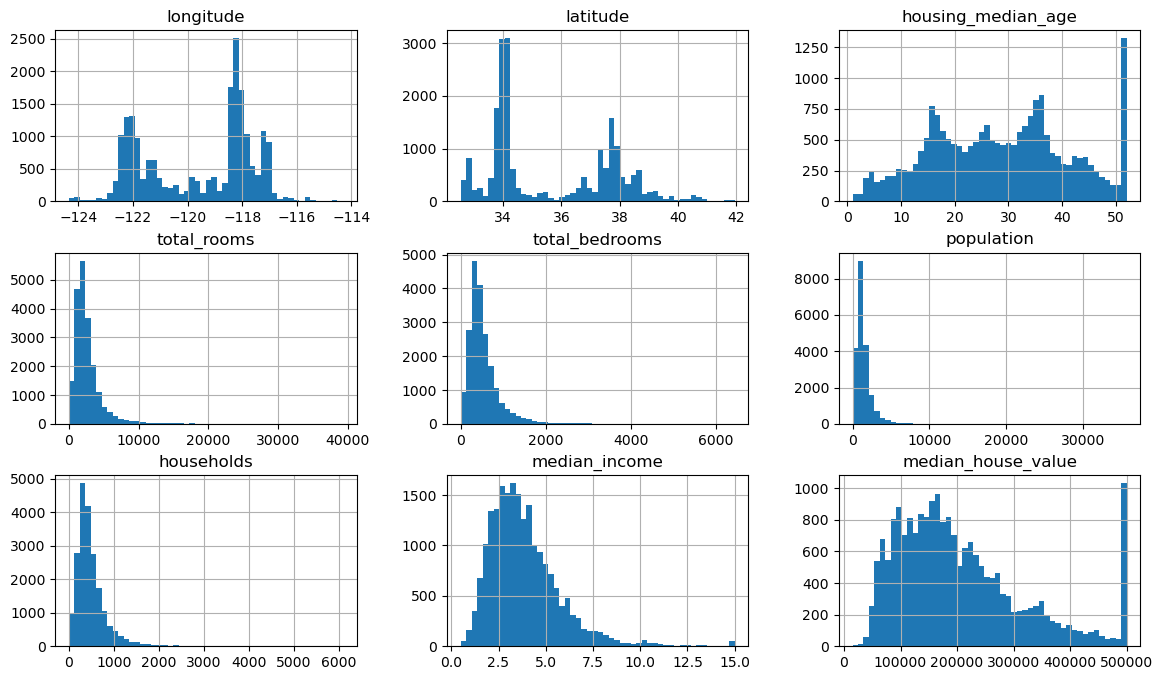

In [296]:
housing.hist(bins=50,figsize=(14,8))
plt.show()

### Outlier removal
Initial cleaning of data, such as removing outliers, before splitting the data.

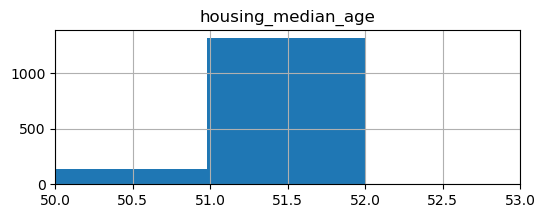

In [297]:
housing[["housing_median_age"]].hist(bins=50,figsize=(6,2))
plt.xlim(50,53)
plt.show()

In [298]:
housing[["housing_median_age"]][housing["housing_median_age"] >50 ].value_counts()

housing_median_age
52.0                  1273
51.0                    48
dtype: int64

In [299]:
housing = housing[housing["housing_median_age"] < 51]

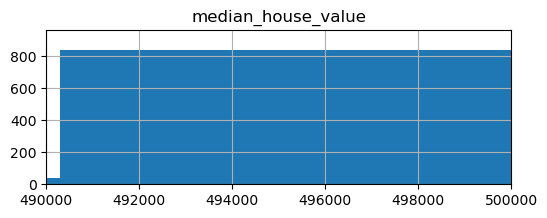

In [300]:
housing[["median_house_value"]].hist(bins=50,figsize=(6,2))
plt.xlim(490000,500000)
plt.show()

In [301]:
housing[["median_house_value"]][housing["median_house_value"] >500000 ].value_counts()

median_house_value
500001.0              791
dtype: int64

In [302]:
housing  = housing[housing["median_house_value"] < 500000]

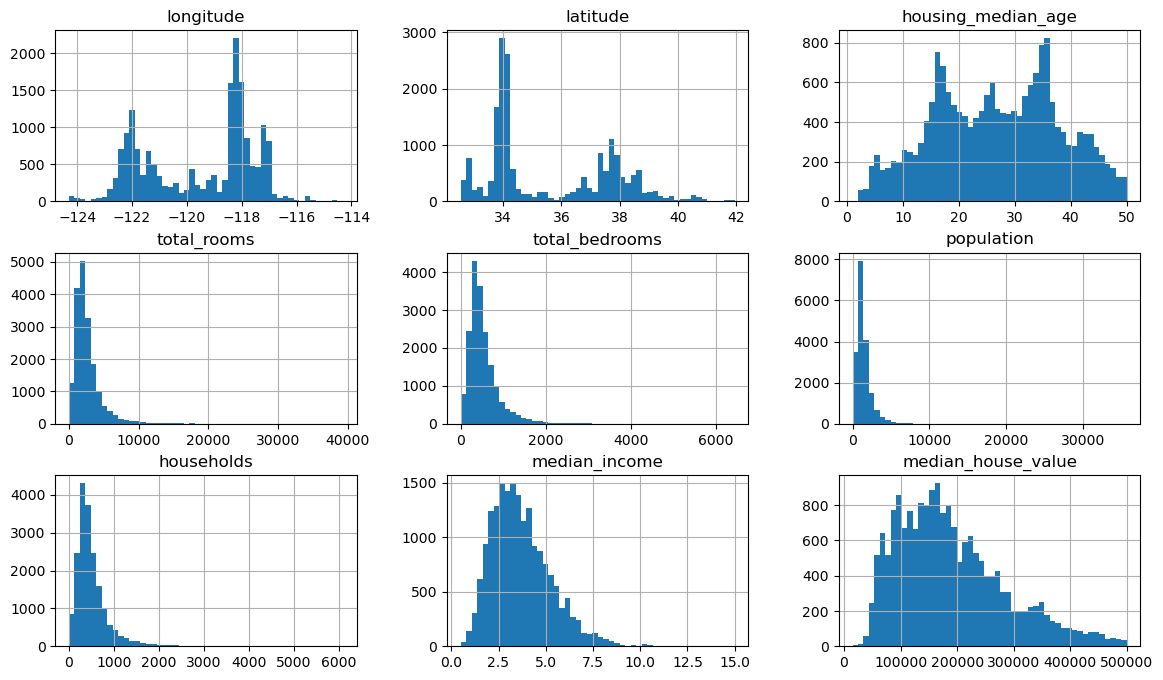

In [303]:
housing.hist(bins=50,figsize=(14,8))
plt.show()

In [304]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18511 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18511 non-null  float64
 1   latitude            18511 non-null  float64
 2   housing_median_age  18511 non-null  float64
 3   total_rooms         18511 non-null  float64
 4   total_bedrooms      18319 non-null  float64
 5   population          18511 non-null  float64
 6   households          18511 non-null  float64
 7   median_income       18511 non-null  float64
 8   median_house_value  18511 non-null  float64
 9   ocean_proximity     18511 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [305]:
#percent of data lost due to outlier removal
(20640-18511)/20640*100

10.314922480620154

- There were some sharp peaks in housing_median_age and median_house_value due to capping at very high age and house price respetively. That is all the houses above that age or house price are considered to be in a single bin.This is bad for machine learning algorithms. Thus we are neglecting those data, meaning our model will be valid only upto those cut offs.

## Create a test set 
It's a good time to set aside some data for testing. Otherwise more data exploration on the full data set can cause overfitting later.

In [306]:
from sklearn.model_selection import train_test_split


In [307]:
housing.corr()["median_house_value"].sort_values(ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9600\2270765898.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corr()["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.664681
total_rooms           0.154184
households            0.100789
total_bedrooms        0.080114
population            0.022858
housing_median_age    0.013501
longitude            -0.023090
latitude             -0.171405
Name: median_house_value, dtype: float64

- Since "median_income" has very high correlation with house price, we do stratified splitting of the data based on "median_income". Since this feature is numerical, needed to be converted to categorical.

In [308]:
[np.percentile(housing.median_income,x) for x in [20,40,60,80] ]

[2.3319, 3.0943, 3.8684, 4.9485]

In [309]:

housing["income_cat"]  = pd.cut(housing.median_income,
                                bins=[0,2.35,3.14,4.0,5.11,np.inf],labels=[1,2,3,4,5])


In [310]:
strat_train, strat_test = train_test_split(housing,test_size=0.2,random_state=42,stratify=housing["income_cat"])

In [311]:
strat_train.income_cat.value_counts()

3    3154
2    3094
1    3037
4    2917
5    2606
Name: income_cat, dtype: int64

In [312]:
for x in (strat_test,strat_train):
    x.drop(["income_cat"],axis=1,inplace=True)

# Explore and visualize the data

- Since we are going to modify the train data for exploration, here we keep a copy of the original.

In [313]:
housing = strat_train.copy()


### Correlations

In [314]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.667138
total_rooms           0.153982
households            0.098628
total_bedrooms        0.077539
housing_median_age    0.020801
population            0.018668
longitude            -0.027229
latitude             -0.167409
Name: median_house_value, dtype: float64

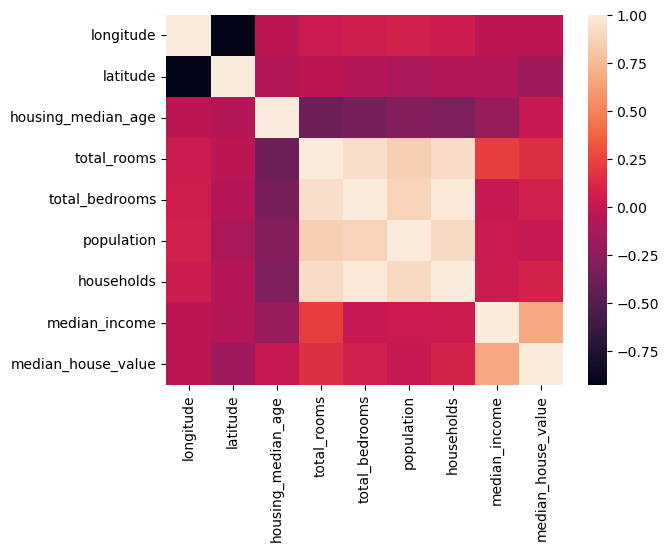

In [315]:
sns.heatmap(corr_matrix)
plt.show()

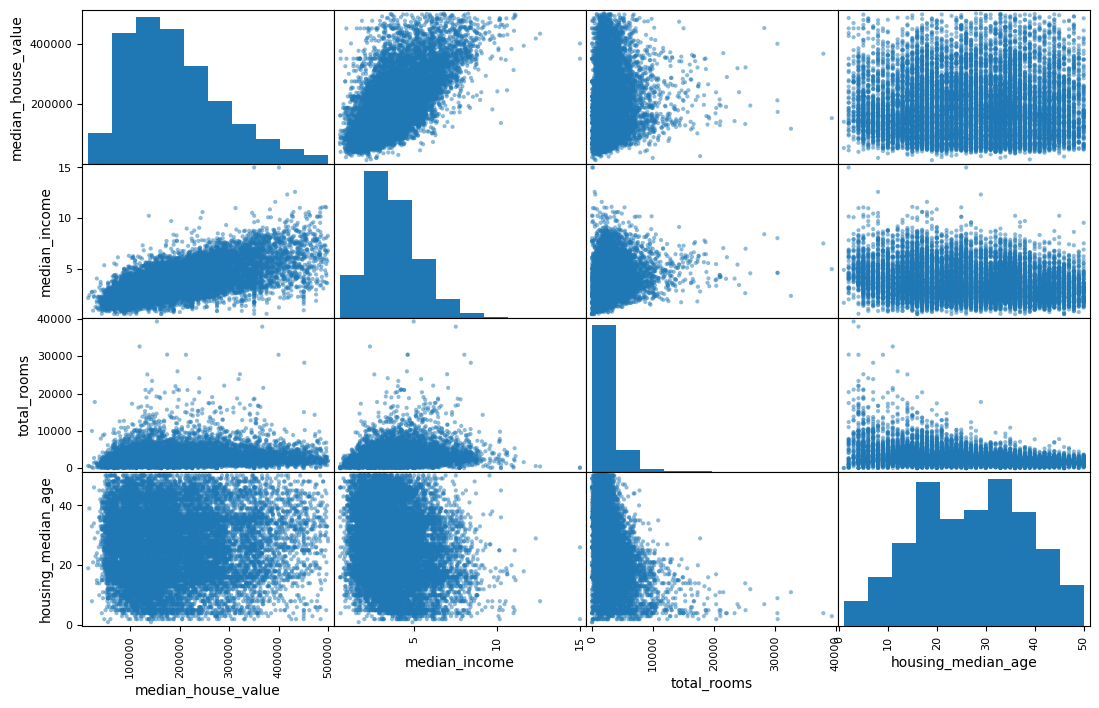

In [316]:
from pandas.plotting import scatter_matrix
features = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[features],figsize=(13,8))
plt.show()

- Some of the attributes has really promising correlation with the target variable, and thus can be useful for prediction. e.g. "median income". However, in the "median income" vs "median_house_value",  we can also observe some unwanted horizontal line, due to caping and some other reasons. We need to remove the corresponding districts later during data cleaning.    

## Experimenting with attribute combinations

- Here, we combine the existing features to get more meaning ful features that may have higher correlations with the target feature.

In [317]:
housing["bedrooms_per_house"] = housing.total_bedrooms/housing.households
housing["rooms_per_house"] = housing.total_rooms/housing.households
housing["person_per_house"] = housing.population/housing.households

housing["bedrooms_per_room"] = housing.total_bedrooms/housing.total_rooms
housing["person_per_room"] = housing.population/housing.total_rooms



In [318]:
housing.corr(numeric_only=True)["median_house_value"].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.667138
bedrooms_per_room     0.237545
latitude              0.167409
total_rooms           0.153982
rooms_per_house       0.118887
households            0.098628
total_bedrooms        0.077539
bedrooms_per_house    0.056343
longitude             0.027229
person_per_room       0.026465
housing_median_age    0.020801
person_per_house      0.018865
population            0.018668
Name: median_house_value, dtype: float64

In [319]:
housing.drop(["person_per_house","bedrooms_per_house","population",
              "total_bedrooms","total_rooms"],axis=1,inplace=True)

In [320]:
housing.corr(numeric_only=True)["median_house_value"].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.667138
bedrooms_per_room     0.237545
latitude              0.167409
rooms_per_house       0.118887
households            0.098628
longitude             0.027229
person_per_room       0.026465
housing_median_age    0.020801
Name: median_house_value, dtype: float64

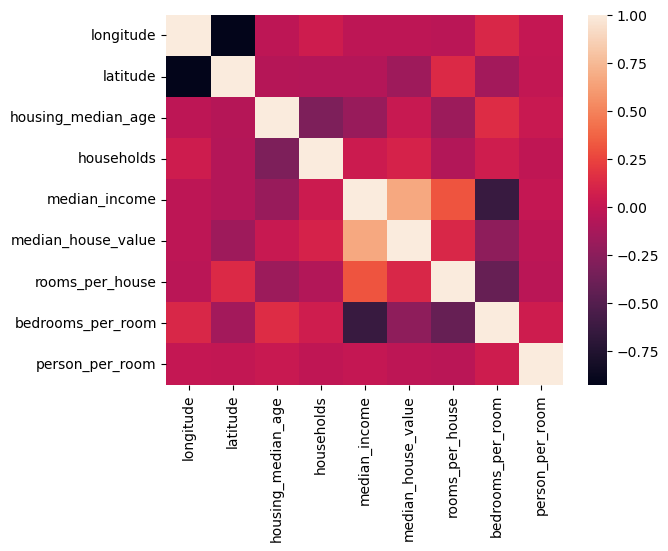

In [321]:
sns.heatmap(housing.corr(numeric_only=True))
plt.show()

The heatmap looks much better now. There is not much multicolinearity between the independent features.

So, we may use these feature set later to train our machine learning model.  

## Prepare the data for the machine learning model

- To clean the dataset, we now revert back to the strat_train data. We sepeate the independent features (predictors) from the target.  


In [322]:
housing = strat_train.drop(["median_house_value"],axis=1)
housing_labels = strat_train["median_house_value"].copy()

In [323]:
print(housing.shape,housing_labels.shape)

(14808, 9) (14808,)


**Clean the data**

- For the numerical features with null elements (if not very high percentage), we will replace the null values by the median using SimpleImputer from sklearn. Since SimpleImputer stores the median values for each fetures, it can be used later on the validation or test data as well.    

In [324]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [325]:
housing_num = housing.select_dtypes(include=np.number)
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [326]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

- The imputer returns a numpy array not a data frame. Thus, we can attach back the index and column values to produce DataFrame again.  

In [327]:
X = pd.DataFrame(imputer.transform(housing_num),index=housing_num.index, columns=housing_num.columns)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14808 entries, 5085 to 8448
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14808 non-null  float64
 1   latitude            14808 non-null  float64
 2   housing_median_age  14808 non-null  float64
 3   total_rooms         14808 non-null  float64
 4   total_bedrooms      14808 non-null  float64
 5   population          14808 non-null  float64
 6   households          14808 non-null  float64
 7   median_income       14808 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


**OneHotEncoding**
- Next, we deal with the only categorical feature we have.

In [328]:
housing_cat = housing.ocean_proximity
housing_cat.head(5)

5085         INLAND
17464     <1H OCEAN
11888        INLAND
12139     <1H OCEAN
4355     NEAR OCEAN
Name: ocean_proximity, dtype: object

- Since we don't have too many categories, we can use OneHotEncoder to convert them into numbers.

In [329]:
from sklearn.preprocessing import OneHotEncoder
OHencoder = OneHotEncoder(handle_unknown="ignore",sparse_output=False)
df_dummy = housing[["ocean_proximity"]]

In [330]:
df_dummy.head()

,ocean_proximity
5085,INLAND
17464,<1H OCEAN
11888,INLAND
12139,<1H OCEAN
4355,NEAR OCEAN


In [331]:
OHencoder.fit_transform(df_dummy)

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [332]:
OHencoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [333]:
df_encoded = pd.DataFrame(OHencoder.fit_transform(df_dummy),
                          columns=OHencoder.get_feature_names_out(),
                          index = df_dummy.index)
df_dummy.join(df_encoded).head()

,ocean_proximity,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5085,INLAND,0.0,1.0,0.0,0.0,0.0
17464,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
11888,INLAND,0.0,1.0,0.0,0.0,0.0
12139,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
4355,NEAR OCEAN,0.0,0.0,0.0,0.0,1.0


## Feature transformation and Scalling

In [334]:
df_dummy = housing[["total_rooms","median_income"]]

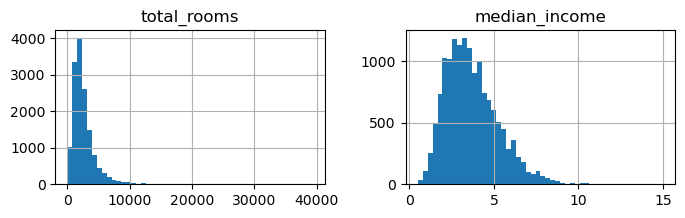

In [335]:
df_dummy.hist(bins=50,figsize=(8,2))
plt.show()

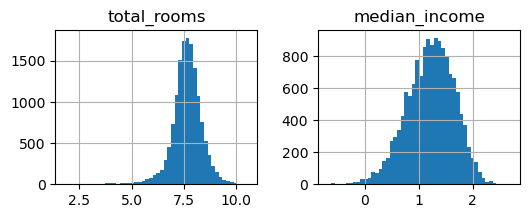

In [336]:
df_dummy = np.log(df_dummy)
df_dummy.hist(bins=50,figsize=(6,2))
plt.show()

- log transformation transforms the skewed distributions to almost normal distribution 

In [337]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

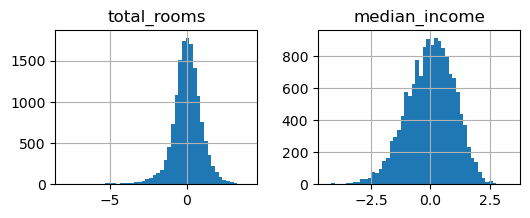

In [338]:
pd.DataFrame(scaler.fit_transform(df_dummy),
             columns=["total_rooms","median_income"] ).hist(bins=50,figsize=(6,2))
plt.show()

- Scalling of the log-transformed data makes them suitable for any machine learning model.

**Function transformer and pipeline** 
- We can perform the data transformation steps in a more compact manner by using pipelines. First, we create transformers for the functions like np.log() or any user defined function. Then we put all the Sklearn transformers and user defined transformers together in a pipeline.   

In [339]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [340]:
log_transform = FunctionTransformer(np.log)
num_preprocessing = Pipeline([("log",log_transform),("scaling",StandardScaler())])

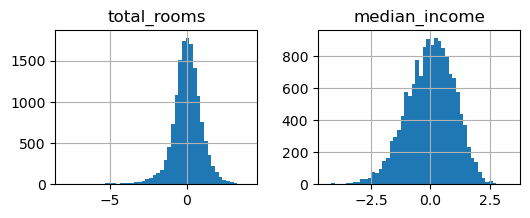

In [341]:
df_dummy = housing[["total_rooms","median_income"]]
df_dummy = num_preprocessing.fit_transform(df_dummy)
pd.DataFrame(df_dummy,columns=["total_rooms","median_income"] ).hist(bins=50,figsize=(6,2))
plt.show()

### To deal with Latitude and Longitude

- The latitude and longitude features have multimodal distribution. One way to deal with such feature is by clustering and then finding the geographic similarities of each instance to the cluster centers. Thus, if we use n-clusters, we will get n new fetures inplace of latitude and longitude.

The following part of the code I am directly borrowing from the HOML book without a deep understanding. Roughly, we are constructing a transfromer "ClusterSimilarity" that can be used to fit and transform the Latitude and Longitude data into cluster similarites. This tranformer will store the cluster information from the training set, and thus can be used later to transform the test or validation dataset in a similar manner.   

In [342]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

In [358]:

class ClusterSimilarity(BaseEstimator,TransformerMixin):
    def __init__(self,n_cluster=10,gamma=1.0,random_state=None):
        self.n_cluster = n_cluster
        self.gamma = gamma
        self.random_state = random_state
        
    def fit(self,X,y=None,sample_weight=None):
        self.kmeans_ = KMeans(self.n_cluster,random_state=self.random_state)
        self.kmeans_.fit(X,sample_weight=sample_weight)
        return self
        
    def transform(self,X):
        return rbf_kernel(X,self.kmeans_.cluster_centers_,gamma=self.gamma)
        
    def get_feature_names_out(self,names=None):
        return [f"Clstr_{i}_smlrity" for i in range(self.n_cluster)]
    
    

In [359]:
cluster_similarity = ClusterSimilarity(n_cluster=10,gamma=1.0,random_state=42)

similarities = cluster_similarity.fit_transform(housing[["latitude","longitude"]],
                                            sample_weight=housing_labels)

pd.DataFrame(similarities,
             columns=cluster_similarity.get_feature_names_out(),index=housing.index).head()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Clstr_0_smlrity,Clstr_1_smlrity,Clstr_2_smlrity,Clstr_3_smlrity,Clstr_4_smlrity,Clstr_5_smlrity,Clstr_6_smlrity,Clstr_7_smlrity,Clstr_8_smlrity,Clstr_9_smlrity
5085,4.227637e-01,5.433638e-11,1.018109e-04,9.040959e-01,1.847173e-19,9.626492e-03,4.122272e-01,3.415634e-01,9.325721e-06,3.133208e-13
17464,1.338202e-12,8.457418e-01,1.386260e-30,1.693404e-11,1.705261e-01,2.991878e-05,2.709612e-16,3.246257e-16,1.083526e-02,9.407509e-01
11888,8.307161e-01,2.050215e-11,1.062397e-04,5.527432e-01,3.603273e-20,2.844759e-03,1.727825e-01,6.678991e-01,9.991704e-06,7.832107e-14
12139,8.085862e-01,4.027988e-12,2.290471e-04,4.287688e-01,3.948072e-21,1.184715e-03,1.668098e-01,8.084893e-01,3.586456e-06,1.253444e-14
4355,6.023577e-08,1.862498e-34,2.882461e-01,1.156976e-08,6.579206e-49,5.639976e-17,6.936790e-06,1.879129e-05,1.481642e-23,1.522215e-38


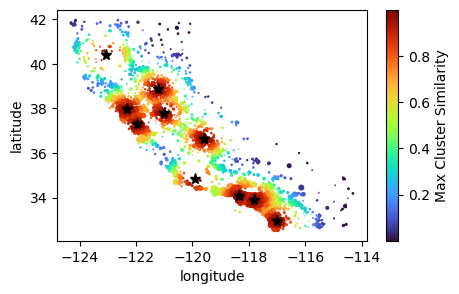

In [360]:
housing_dummy = housing.copy()
housing_dummy["Max Cluster Similarity"] = similarities.max(axis=1)
cluster_centers = cluster_similarity.kmeans_.cluster_centers_


housing_dummy.plot(y="latitude",x="longitude",kind="scatter",
             s=housing_dummy["population"]/1000,c="Max Cluster Similarity",
             colorbar=True,legend=True,figsize=(5,3),cmap = "turbo")
plt.plot(cluster_centers[:,1],cluster_centers[:,0],color='black', marker='*',
         linestyle='',linewidth=2, markersize=8)
plt.show()




### Using Transformation pipelines

In [361]:
housing = strat_train.drop(["median_house_value"],axis=1)
housing_labels = strat_train["median_house_value"].copy()

- Adding new features from our investigation in feature engineering. 

In [362]:
housing["rooms_per_house"] = housing.total_rooms/housing.households
housing["bedrooms_per_room"] = housing.total_bedrooms/housing.total_rooms
housing["person_per_room"] = housing.population/housing.total_rooms

In [363]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bedrooms_per_room,person_per_room
5085,-121.30,37.94,40.0,452.0,109.0,412.0,97.0,1.3417,INLAND,4.659794,0.241150,0.911504
17464,-118.04,33.81,22.0,4057.0,624.0,2204.0,643.0,5.8527,<1H OCEAN,6.309487,0.153808,0.543259
11888,-121.77,37.67,20.0,8068.0,1217.0,3489.0,1259.0,5.7907,INLAND,6.408261,0.150843,0.432449
12139,-121.93,37.74,16.0,3326.0,419.0,1272.0,402.0,6.8806,<1H OCEAN,8.273632,0.125977,0.382441
4355,-124.14,40.72,18.0,2581.0,499.0,1375.0,503.0,2.8446,NEAR OCEAN,5.131213,0.193336,0.532739


In [364]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

In [365]:
log_transform = FunctionTransformer(np.log, feature_names_out='one-to-one')

In [366]:
# Numerical pipelines
log_pipeline = Pipeline([("num_imputer",SimpleImputer(strategy="median")),
                         ("log_transform",log_transform),
                         ("num_scaler",StandardScaler())
                         ])

cluster_pipeline = Pipeline([("cluster_similar",cluster_similarity),
                         ("num_scaler",StandardScaler())
                         ])

default_num_pipeline = Pipeline([("num_imputer",SimpleImputer(strategy="median")),
                         ("num_scaler",StandardScaler())   
                         ])


#Categorical pipelines

cat_pipeline = Pipeline([("cat_imputer",SimpleImputer(strategy="most_frequent")),
                        ("OHencoder",OneHotEncoder(handle_unknown="ignore",sparse_output=False))
                         ])

In [367]:
column_transformer1 =ColumnTransformer([
    ( "log",log_pipeline,["total_rooms","total_bedrooms","population",
                          "households","median_income","bedrooms_per_room"] ),
    ("cluster",cluster_pipeline,["latitude","longitude"]),
    ("cat_pipe",cat_pipeline,["ocean_proximity"]),    
                                        ],
        remainder=default_num_pipeline)

In [368]:
house_transformed = column_transformer1.fit_transform(housing)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [369]:
house_transformed.shape

(14808, 24)

In [370]:
pd.DataFrame(house_transformed).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14808 entries, 0 to 14807
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       14808 non-null  float64
 1   1       14808 non-null  float64
 2   2       14808 non-null  float64
 3   3       14808 non-null  float64
 4   4       14808 non-null  float64
 5   5       14808 non-null  float64
 6   6       14808 non-null  float64
 7   7       14808 non-null  float64
 8   8       14808 non-null  float64
 9   9       14808 non-null  float64
 10  10      14808 non-null  float64
 11  11      14808 non-null  float64
 12  12      14808 non-null  float64
 13  13      14808 non-null  float64
 14  14      14808 non-null  float64
 15  15      14808 non-null  float64
 16  16      14808 non-null  float64
 17  17      14808 non-null  float64
 18  18      14808 non-null  float64
 19  19      14808 non-null  float64
 20  20      14808 non-null  float64
 21  21      14808 non-null  float64
 22

In [371]:
column_transformer1.get_feature_names_out()

array(['log__total_rooms', 'log__total_bedrooms', 'log__population',
       'log__households', 'log__median_income', 'log__bedrooms_per_room',
       'cluster__Clstr_0_smlrity', 'cluster__Clstr_1_smlrity',
       'cluster__Clstr_2_smlrity', 'cluster__Clstr_3_smlrity',
       'cluster__Clstr_4_smlrity', 'cluster__Clstr_5_smlrity',
       'cluster__Clstr_6_smlrity', 'cluster__Clstr_7_smlrity',
       'cluster__Clstr_8_smlrity', 'cluster__Clstr_9_smlrity',
       'cat_pipe__ocean_proximity_<1H OCEAN',
       'cat_pipe__ocean_proximity_INLAND',
       'cat_pipe__ocean_proximity_ISLAND',
       'cat_pipe__ocean_proximity_NEAR BAY',
       'cat_pipe__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age', 'remainder__rooms_per_house',
       'remainder__person_per_room'], dtype=object)

## Training and evaluating models

**Defining housing test set**

In [390]:
housing_test = strat_test.drop(["median_house_value"],axis=1)
housing_test_labels = strat_test["median_house_value"].copy()

housing_test["rooms_per_house"] = housing_test.total_rooms/housing_test.households
housing_test["bedrooms_per_room"] = housing_test.total_bedrooms/housing_test.total_rooms
housing_test["person_per_room"] = housing.population/housing.total_rooms

### Linear regression model

In [391]:
from sklearn.linear_model import LinearRegression

In [392]:
lin_reg = make_pipeline(column_transformer1,LinearRegression())
lin_reg.fit(housing,housing_labels)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('num_imputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('num_scaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('num_scaler...
                                                  Pipeline(steps=[('cluster_similar',
                                                                   ClusterSimilarity(random_state=42)),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OHencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [393]:
from sklearn.metrics import mean_squared_error

In [394]:
housing_prediction = lin_reg.predict(housing)
print("Training data rms error is ",
      mean_squared_error(housing_labels,housing_prediction,squared=False))

Training data rms error is  58359.7474138346


In [395]:
housing_prediction = lin_reg.predict(housing_test)
print("Testing data rms error is ",
      mean_squared_error(housing_test_labels,housing_prediction,squared=False))

Testing data rms error is  59740.36664320876
